In [1]:
import pandas as pd
import numpy as np
import pickle
import ot
from free_support_barycenters.bary import pairwise_bary
import matplotlib.pyplot as plt

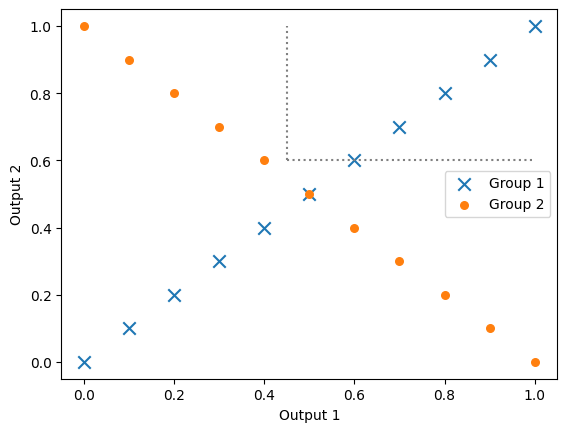

In [2]:
### curated samples

group_1=np.transpose(np.array([np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)]))
group_2=np.transpose(np.array([np.arange(0,1.1,0.1),1-np.arange(0,1.1,0.1)]))

plt.scatter(x=group_1[:,0], y=group_1[:,1], label="Group 1",marker="x",s=80 ) #marker="x",s=80
plt.scatter(x=group_2[:,0], y=group_2[:,1], label="Group 2",marker="o",s=30) #marker="o",,c=cs=30
plt.plot([0.45,0.45],[0.6,1.0], ':', c='gray')
plt.plot([0.45,1.0],[0.6,0.6],':', c='gray')
plt.xlabel("Output 1")
plt.ylabel("Output 2")
plt.legend()
plt.rcParams.update({'font.size': 15})
plt.show()

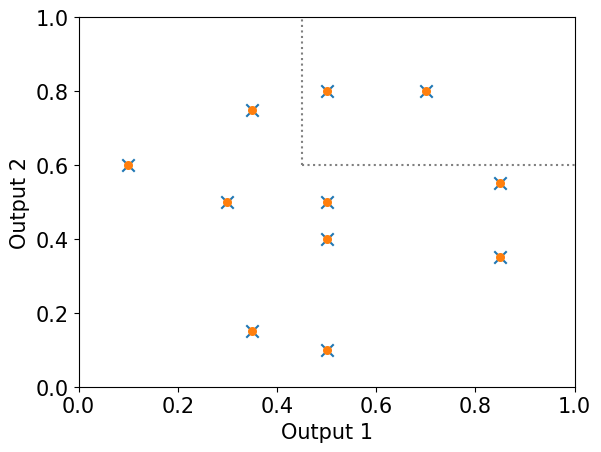

In [3]:
### Optimal transportation to the barycenter
samples=np.concatenate([group_1,group_2])
masses=[np.array([1/11]*11+[0]*11),np.array([0]*11+[1/11]*11)]
pairwise_supp, pairwise_masses, err_bound = pairwise_bary(samples, masses, compute_err_bound=True)
transport=[None]*2
cost = ot.dist(group_1, pairwise_supp)
a = [1/11] * 11
b = pairwise_masses
transport[0] = ot.emd(a, b, cost)
cost = ot.dist(group_2, pairwise_supp)
a = [1/11] * 11
b = pairwise_masses
transport[1] = ot.emd(a, b, cost)

destination=[None]*2
destination[0] = np.empty((11, 2))
destination[1] = np.empty((11, 2))
for i in range(11):
  index = np.random.choice(np.nonzero(transport[0][i])[0], 1, p=transport[0][i][np.nonzero(transport[0][i])[0]]*transport[0].shape[0])
  destination[0][i] = pairwise_supp[index]
for i in range(11):
  index = np.random.choice(np.nonzero(transport[1][i])[0], 1, p=transport[1][i][np.nonzero(transport[1][i])[0]]*transport[1].shape[0])
  destination[1][i] = pairwise_supp[index]




plt.scatter(x=destination[0][:,0], y=destination[0][:,1], label="Group 1",marker="x", s=80)# s=80
plt.scatter(x=destination[1][:,0], y=destination[1][:,1], label="Group 2",marker="o",s=30 )#marker="o",c=c, s=30
plt.plot([0.45,0.45],[0.6,1.0], ':', c='gray')
plt.plot([0.45,1.0],[0.6,0.6],':', c='gray')
plt.xlabel("Output 1")
plt.ylabel("Output 2")
plt.xlim(0,1)    
plt.ylim(0,1) 
plt.rcParams.update({'font.size': 15})
plt.show()







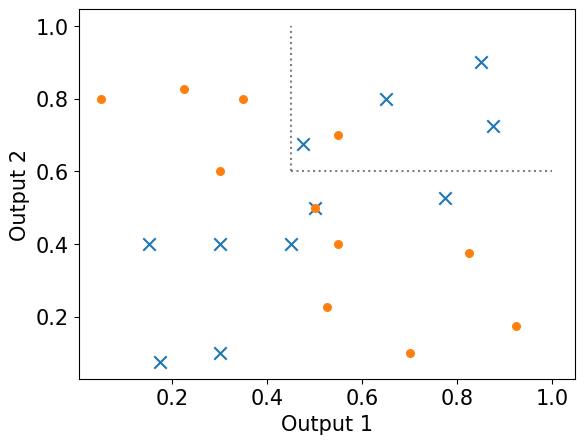

In [4]:
### Partially transport to the barycenter
alpha=0.5
mid_points1=np.zeros((11,2))
for i in range(11):
    mid_points1[i] = (1 - alpha) * (destination[0][i]) + alpha * (group_1[i])
mid_points2=np.zeros((11,2))
for i in range(11):
    mid_points2[i] = (1 - alpha) * (destination[1][i]) + alpha * (group_2[i])

plt.scatter(x=mid_points1[:,0], y=mid_points1[:,1],marker="x",s=80)#, s=80
plt.scatter(x=mid_points2[:,0], y=mid_points2[:,1],marker="o",s=30)# s=30,c=c
plt.plot([0.45,0.45],[0.6,1.0], ':', c='gray')
plt.plot([0.45,1.0],[0.6,0.6],':', c='gray')

plt.xlabel("Output 1")
plt.ylabel("Output 2")
    
plt.rcParams.update({'font.size': 15})
plt.show()